In [3]:
# auto reload for python packages
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
from SubGraphMatcher import SubGraphMatcher 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
def draw_graph(G):
    labels = nx.get_node_attributes(G, 'feat') 
    options = {
        'node_color': 'yellow',
        'node_size': 400,
        'width': 3,
        'labels': labels,
        'with_labels': True
    }
    nx.draw(G, **options)
    plt.show()


In [31]:
# Test the node feature part
G1 = nx.Graph()
G1.add_nodes_from([
    (0, {'feat': 'A'}),
    (1, {'feat': 'B'}),
    (2, {'feat': 'C'}),
    (3, {'feat': 'D'}),
])
G1.add_edges_from([
    (0, 1),
    (0, 2),
    (1, 2),
    (1, 3),
    (2, 3)])
# draw_graph(G1)

In [32]:
G2 = nx.Graph()
G2.add_nodes_from([
    (0, {'feat': 'A'}),
    (1, {'feat': 'C'}),
    (2, {'feat': 'B'}),
    (3, {'feat': 'C'}),
    (4, {'feat': 'B'}),
    (5, {'feat': 'C'}),
    (6, {'feat': 'B'}),
    (7, {'feat': 'C'}),
    (8, {'feat': 'D'}),
    (9, {'feat': 'D'}),
    (10, {'feat': 'D'}),
    (11, {'feat': 'D'}),
    (12, {'feat': 'D'}),
    (13, {'feat': 'C'}),
    (14, {'feat': 'D'}),
])
G2.add_edges_from([
    (0, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (0, 5),
    (0, 6),
    (0, 7),
    (1, 2),
    (1, 8),
    (2, 9),
    (2, 10),
    (3, 4),
    (3, 10),
    (4, 5),
    (4, 10),
    (4, 11),
    (4, 12),
    (5, 12),
    (6, 12),
    (6, 13),
    (7, 14),
    (9, 10),
])
# draw_graph(G2)

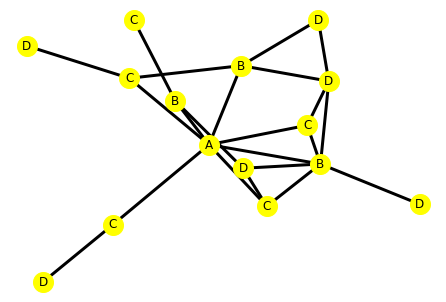

In [33]:
draw_graph(G2)

In [34]:
# Validate the subgraph matching with node features
SGM = SubGraphMatcher(G2)
SGM.check_match_subgraph(G1)

Running LDF...
--- 8.082389831542969e-05 seconds ---, LDF Done
After the filtering, 66.66666666666666% of the nodes left
running NLF...
--- 0.0005350112915039062 seconds ---, NLF Done
After the filtering, 60.0% of the nodes left
[(0, 0), (1, 2), (1, 4), (1, 6), (2, 1), (2, 3), (2, 5), (3, 10), (3, 12)]
Using plain ordering...
enumerating...
enumeration done, takes 0.0001468658447265625s
enumeration runs 10 times
--- 0.0016150474548339844 seconds ---, Job done
Totally find 2 matches.
 
 


[0.6, [{0: 0, 1: 4, 2: 3, 3: 10}, {0: 0, 1: 4, 2: 5, 3: 12}]]

In [27]:
SGM.backward_neighbors(3, [0,1,2,3], G1)

[]

In [ ]:
# Some visualization
SGM.draw_multi_results()